# User Engagement Analysis

In [25]:
# general
import os
import gc
import sys
import pickle
from datetime import timedelta

# wranglers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"
%matplotlib inline


import seaborn as sns
from sklearn.cluster import KMeans

# custom modules
cwd = os.getcwd()
parent = cwd.replace('/notebooks', '')
sys.path.insert(0, parent) 

from scripts.utils import DataLoader
from scripts.visualization import Plotters
from scripts.cleaning import CleanDataFrame
from scripts.exploration import Analysis

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
analyzer = Analysis()
cleaner = CleanDataFrame()
plotter = Plotters(w=7, h=5)

In [5]:
df = DataLoader("../data", "missing_cleaned.csv").read_csv()
# df = cleaner.rename_columns(df)
# df = cleaner.fix_datatypes(df)
# df = cleaner.handle_missing_value(df, verbose=False)

df.head()

Unnamed: 0               Bearer Id                Start  Start ms                  End  End ms               IMSI  MSISDN/Number              IMEI     Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  Activity Duration DL (ms)  Activity Duration UL (ms)       Dur. ms Handset Manufacturer                 Handset Type  Nb of sec with 125000B < Vol DL  Nb of sec with 1250B < Vol UL < 6250B  Nb of sec with 31250B < Vol DL < 125000B  Nb of sec with 37500B < Vol UL  Nb of sec with 6250B < Vol DL < 31250B  Nb of sec with 6250B < Vol UL < 37500B  Nb of sec with Vol DL < 6250B  Nb of sec with Vol UL < 1250B  Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)
0           0 13114483460844900352.00  2019-04-04 12:01:00    770.00  2019-04-25 14:35:00  662.00 208201448079117.00 33664962239.00 35521209507511.00  9.16456699548519E+015            42.00             5.00                    23.00                    44.00                  21006808.73                    771051.81               100.00                            0.00                           0.00                0.00               100.00                           0.00                            0.00                  0.00       2007958.00        235906.00                   37624.00                   38787.00 1823652892.00              Samsung   Samsung Galaxy A5 Sm-A520F                           131.00                                  53.00                                    168.00                            8.00                                  293.00                                    8.00                         213.00                         214.00               1545765.00                 24420.00         1634479.00         1271433.00        3563542.00         137762.00         15854611.00          2501332.00          8198936.00          9656251.00       278082303.00        14344150.00      171744450.00        8814393.00       36749741.00      308879636.00
1           1 13114483482878900224.00  2019-04-09 13:04:00    235.00  2019-04-25 08:15:00  606.00 208201909211140.00 33681854413.00 35794009006359.00                L77566A            65.00             5.00                    16.00                    26.00                  21006808.73                    771051.81               100.00                            0.00                           0.00                0.00               100.00                           0.00                            0.00                  0.00       2007958.00        235906.00                     168.00                    3560.00 1365104371.00              Samsung  Samsung Galaxy J5 (Sm-J530)                           131.00                                  53.00                                    168.00                            8.00                                  293.00                                    8.00                         971.00                        1022.00               1926113.00                  7165.00         3493924.00          920172.00         629046.00         308339.00         20247395.00         19111729.00         18338413.00         17227132.00       608750074.00         1170709.00      526904238.00       15055145.00       53800391.00      653384965.00
2           2 13114483484080500736.00  2019-04-09 17:42:00      1.00  2019-04-25 11:58:00  652.00 208200314458056.00 33760627129.00 35281510359387.00                D

## Tracking user's engagement

We will track user's engagement using the following metrics:

- sessions frequency 
- the duration of the session 
- the sessions total traffic (download and upload (bytes))


In [6]:
# Group users
users_data = df.groupby('MSISDN/Number')


### Session frequency

In [7]:

# Get sessions frequency (count the number of sessions)
users_sessions_frequency = users_data['Bearer Id'].count()
users_sessions_frequency


MSISDN/Number
33601001722.00        1
33601001754.00        1
33601002511.00        1
33601007832.00        1
33601008617.00        2
                     ..
33789996170.00        1
33789997247.00        1
3197020876596.00      1
337000037000919.00    1
882397108489451.00    1
Name: Bearer Id, Length: 106471, dtype: int64

### Session duration

In [8]:
# How long each session was
users_sessions_duration = users_data['Dur. ms'].sum()
users_sessions_duration



MSISDN/Number
33601001722.00       116720140.00
33601001754.00       181230963.00
33601002511.00       134969374.00
33601007832.00        49878024.00
33601008617.00        37104453.00
                         ...     
33789996170.00         8810688.00
33789997247.00       140988659.00
3197020876596.00     877385325.00
337000037000919.00   253030201.00
882397108489451.00   869844200.00
Name: Dur. ms, Length: 106471, dtype: float64

### Session total traffic

In [9]:
# data volume per session
apps = ['Social Media DL (Bytes)',
        'Social Media UL (Bytes)',
        'Google DL (Bytes)',
        'Google UL (Bytes)',
        'Email DL (Bytes)',
        'Email UL (Bytes)',
        'Youtube DL (Bytes)',
        'Youtube UL (Bytes)',
        'Netflix DL (Bytes)',
        'Netflix UL (Bytes)',
        'Gaming DL (Bytes)',
        'Gaming UL (Bytes)',
        'Other DL (Bytes)',
        'Other UL (Bytes)']
user_session_data_vol = users_data[apps].sum().sum(axis=1)


In [10]:
user_engagment = pd.DataFrame(
    {
        "MSISDN": users_sessions_frequency.index.values,
        "session_freq": users_sessions_frequency.values,
        "session_duration": users_sessions_duration.values,
        "session_data_volume": user_session_data_vol.values
    }
)
# user_engagment.sort_values(['session_freq', 'session_duration', 'session_data_volume'],
#                            ascending=False, inplace=True)
# user_engagment.reset_index(drop=True, inplace=True)
# user_engagment.info()


In [11]:
top_ten_session_freq = analyzer.get_top_ten(user_engagment, 'session_freq')
print("+"*10, "Users with top_ten_session_freq", "+"*10)
display(top_ten_session_freq)
top_ten_session_duration = analyzer.get_top_ten(user_engagment, 'session_duration')
print("+"*10, "Users with top_ten_session_duration", "+"*10)
display(top_ten_session_duration)
top_ten_session_dat_vol = analyzer.get_top_ten(user_engagment, 'session_data_volume')
print("+"*10, "Users with top_ten_session_dat_vol", "+"*10)
display(top_ten_session_dat_vol)

++++++++++ Users with top_ten_session_freq ++++++++++


MSISDN  session_freq  session_duration  session_data_volume
0 33626320676.00            18     8791936680.00       15996644092.00
1 33614892860.00            17     9966905758.00       16341524035.00
2 33625779332.00            17    18553763486.00       14701273330.00
3 33659725664.00            16     4035436251.00       13888413360.00
4 33760536639.00            15     9279442000.00       13104812243.00
5 33675877202.00            15     4865953827.00       14556184322.00
6 33667163239.00            13     8744922020.00       10455927858.00
7 33604515716.00            12     5207995411.00        9547813149.00
8 33760413819.00            12     5321673794.00       11120874571.00
9 33603127838.00            12     6287767483.00       11198899762.00

++++++++++ Users with top_ten_session_duration ++++++++++


MSISDN  session_freq  session_duration  session_data_volume
0 33625779332.00            17    18553763486.00       14701273330.00
1 33614892860.00            17     9966905758.00       16341524035.00
2 33760536639.00            15     9279442000.00       13104812243.00
3 33626320676.00            18     8791936680.00       15996644092.00
4 33667163239.00            13     8744922020.00       10455927858.00
5 33662840755.00             9     6614274287.00        7893475177.00
6 33664693736.00             9     6288735771.00       10544958329.00
7 33603127838.00            12     6287767483.00       11198899762.00
8 33667456716.00             6     5649885358.00        5377518019.00
9 33760413819.00            12     5321673794.00       11120874571.00

++++++++++ Users with top_ten_session_dat_vol ++++++++++


MSISDN  session_freq  session_duration  session_data_volume
0 33614892860.00            17     9966905758.00       16341524035.00
1 33626320676.00            18     8791936680.00       15996644092.00
2 33625779332.00            17    18553763486.00       14701273330.00
3 33675877202.00            15     4865953827.00       14556184322.00
4 33659725664.00            16     4035436251.00       13888413360.00
5 33760536639.00            15     9279442000.00       13104812243.00
6 33666464084.00            11     4536763706.00       11570705616.00
7 33658361927.00            10     2131716241.00       11358177354.00
8 33603127838.00            12     6287767483.00       11198899762.00
9 33698792269.00            11     5169133917.00       11139052121.00

## User Clustering with K-Means

In [12]:
user_engagment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106471 entries, 0 to 106470
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MSISDN               106471 non-null  float64
 1   session_freq         106471 non-null  int64  
 2   session_duration     106471 non-null  float64
 3   session_data_volume  106471 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 3.2 MB


In [13]:
user_engagment = cleaner.fix_datatypes(user_engagment, column='MSISDN', to_type=str)
user_engagment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106471 entries, 0 to 106470
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MSISDN               106471 non-null  object 
 1   session_freq         106471 non-null  int64  
 2   session_duration     106471 non-null  float64
 3   session_data_volume  106471 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ MB


In [14]:
# Pre-Process / Normalize
norm_user_engagment = cleaner.normalize(user_engagment)

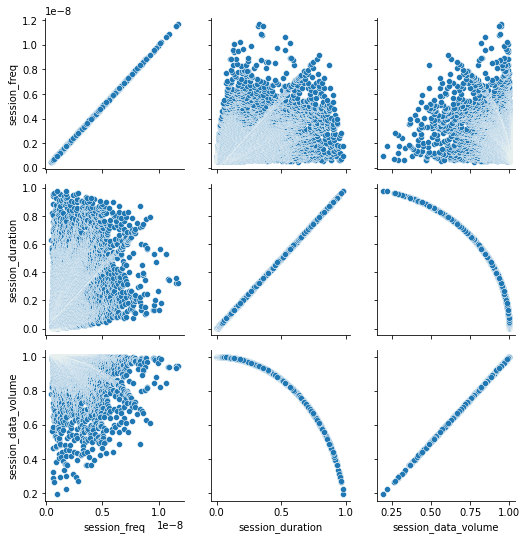

In [15]:
g = sns.PairGrid(norm_user_engagment)
g.map(sns.scatterplot)

In [16]:
X = np.array(norm_user_engagment)
X.shape
# user_engagment

(106471, 3)

In [17]:
kmeans = KMeans(n_clusters=3, 
                init='k-means++',
                max_iter=300, 
                n_init=10,
                random_state=10)
engagement_model = kmeans.fit(X)
with open("../models/engagement_clustering_model.pkl", "wb") as f:
    pickle.dump(engagement_model, f)
    print("model saved")

user_engagment['clusters_by_engagement'] = engagement_model.predict(X)
user_engagment.head()

model saved


MSISDN  session_freq  session_duration  session_data_volume  clusters_by_engagement
0  33614892860.0            17     9966905758.00       16341524035.00                       1
1  33626320676.0            18     8791936680.00       15996644092.00                       1
2  33625779332.0            17    18553763486.00       14701273330.00                       1
3  33675877202.0            15     4865953827.00       14556184322.00                       2
4  33659725664.0            16     4035436251.00       13888413360.00                       2

Now, I will try to aggrigate the non- normalized metrics data we have per cluster.
 - Minminm
 - Maximum
 - Mean
 - total sum

In [18]:
user_engagment.iloc[:, 1:].groupby("clusters_by_engagement").agg(['count', 'min', 'max', 'mean', 'sum', 'std', 'skew'])

session_freq                                session_duration                                                                             session_data_volume                                                                              
                              count min max mean     sum  std skew            count         min            max         mean              sum          std  skew               count         min            max          mean                sum          std skew
clusters_by_engagement                                                                                                                                                                                                                                           
0                             74643   1  11 1.41  105294 0.77 2.51            74643  7142988.00   887595195.00 107603874.56 8031876008751.00  86043093.01  1.95               74643 98851271.00  8447481705.00 1401327846.61 104599314454748.00 795390719.93 2.07
1                              4169   1  18 1.23    5145 1.03 8.07             4169 31478342.00 18553763486.00 343397893.13 1431625816443.00 610852424.14 12.22                4169 58362293.00 16341524035.00  611596400.86   2549745395204.00 984109627.60 7.66
2                             27659   1  16 1.38   38067 0.85 3.81            27659 17265327.00  4865953827.00 222068472.14 6142191870908.00 205271381.59  5.64               27659 81095482.00 14556184322.00 1049257691.30  29021418483542.00 841635315.90 3.64

**Cluster - 0**:

    - They have the largest total session count, session total duration, and session data volume
    - And the clustering seems good because there is little variance within the cluster

**Cluster - 1**:

    - This cluster holds users with more extream min and max metrics. But since they are mostly extreams, there are fewer users in this group. The mean is also the smalles because of this. 

**Cluster - 2**:

    - If we rank the clusters based on the above table, this cluster would be in the middle. 

The `cluster_by_engagemet` column values don't represent rank. They are just lables given by the algorithm. 

## Aggrigating user total traffic per app

In [19]:
# get app columns
app_columns = [col for col in df.columns if col.endswith('L (Bytes)')][2:-2]
uldl_per_app = users_data[app_columns].agg('sum')
# total_traffic_per_app.head()
uldl_per_app_columns = uldl_per_app.columns
app_columns_pairs = [[uldl_per_app_columns[i], uldl_per_app_columns[i+1]]
               for i in range(0, len(uldl_per_app_columns)-1, 2)]

for app_uldl in app_columns_pairs:
    app_name = " ".join(app_uldl[0].split()[:-2]).strip()
    uldl_per_app[app_name] = uldl_per_app[app_uldl].sum(
        axis=1)
    uldl_per_app.drop(columns=app_uldl, inplace=True)
uldl_per_app.head()


Social Media      Google      Email     Youtube     Netflix        Gaming        Other
MSISDN/Number                                                                                         
33601001722.00    2232135.00  4389005.00 1331362.00 21624548.00 27180981.00  812458661.00 386570872.00
33601001754.00    2660565.00  5334863.00 3307781.00 12432223.00 11221763.00  119750078.00 281710071.00
33601002511.00    3195623.00  3443126.00 3205380.00 21333570.00 19353900.00  538827713.00 501693672.00
33601007832.00     280294.00  9678493.00 2284670.00  6977321.00  1942092.00  391126127.00  35279702.00
33601008617.00    2912542.00 18499616.00 3305469.00 41533002.00 49201724.00 1314797820.00 804804484.00

For each app let's see the top 10 engaged users.

In [20]:
for column in uldl_per_app.columns:
    top_ten = analyzer.get_top_ten(uldl_per_app, column, drop_index=False).index.values
    print(f"{'+'*15}The 10 most engaged {column} users are:{'+'*15}")
    display(top_ten)

+++++++++++++++The 10 most engaged Social Media users are:+++++++++++++++


array([3.36263207e+10, 3.37605366e+10, 3.36597257e+10, 3.36148929e+10,
       3.36257793e+10, 3.36671632e+10, 3.37863231e+10, 3.36690689e+10,
       3.36031278e+10, 3.36584908e+10])

+++++++++++++++The 10 most engaged Google users are:+++++++++++++++


array([3.36263207e+10, 3.36257793e+10, 3.36148929e+10, 3.37605366e+10,
       3.36597257e+10, 3.37863231e+10, 3.36758772e+10, 3.36671632e+10,
       3.37612682e+10, 3.36987564e+10])

+++++++++++++++The 10 most engaged Email users are:+++++++++++++++


array([3.36263207e+10, 3.36148929e+10, 3.36257793e+10, 3.37863231e+10,
       3.36597257e+10, 3.37605366e+10, 3.36758772e+10, 3.36654605e+10,
       3.36671632e+10, 3.36987923e+10])

+++++++++++++++The 10 most engaged Youtube users are:+++++++++++++++


array([3.36257793e+10, 3.37605366e+10, 3.36148929e+10, 3.36263207e+10,
       3.36758772e+10, 3.36671632e+10, 3.36270810e+10, 3.37604138e+10,
       3.36987923e+10, 3.36031278e+10])

+++++++++++++++The 10 most engaged Netflix users are:+++++++++++++++


array([3.36597257e+10, 3.36148929e+10, 3.36257793e+10, 3.37605366e+10,
       3.36263207e+10, 3.37604138e+10, 3.36671632e+10, 3.36758772e+10,
       3.37863231e+10, 3.37612682e+10])

+++++++++++++++The 10 most engaged Gaming users are:+++++++++++++++


array([3.36148929e+10, 3.37605366e+10, 3.36257793e+10, 3.36758772e+10,
       3.36263207e+10, 3.36597257e+10, 3.36664641e+10, 3.37604138e+10,
       3.36647129e+10, 3.36987923e+10])

+++++++++++++++The 10 most engaged Other users are:+++++++++++++++


array([3.36263207e+10, 3.36148929e+10, 3.36758772e+10, 3.36257793e+10,
       3.36031278e+10, 3.36597257e+10, 3.36269483e+10, 3.36270810e+10,
       3.37612682e+10, 3.36583619e+10])

Here is an aggregate sum of each app's traffic accross all users.

<AxesSubplot:title={'center':'The 3 apps with the biggest traffic'}, xlabel='Apps', ylabel='Traffic in Bytes'>

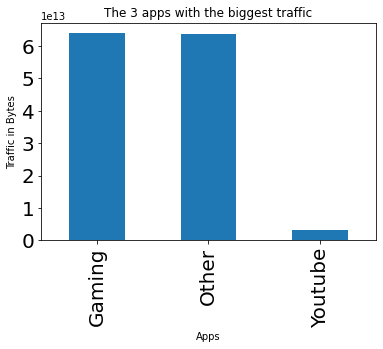

In [21]:
total_app_traffic = uldl_per_app.sum().nlargest(3)
total_app_traffic.plot.bar(fontsize=20, title="The 3 apps with the biggest traffic", xlabel="Apps", ylabel="Traffic in Bytes")

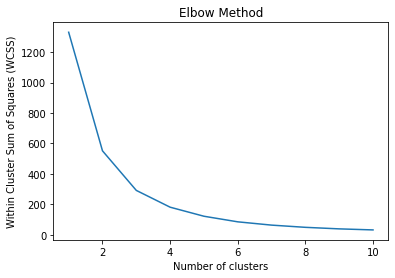

In [22]:

wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters=i,
                   init='k-means++',                 # Initialization method for kmeans
                   max_iter=300,                     # Maximum number of iterations
                   # Choose how often algorithm will run with different centroid
                   n_init=10,
                   random_state=0)                   # Choose random state for reproducibility
    model.fit(X)
    wcss.append(model.inertia_)

# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()


Let's see what our clusters look like on a 3D axis.

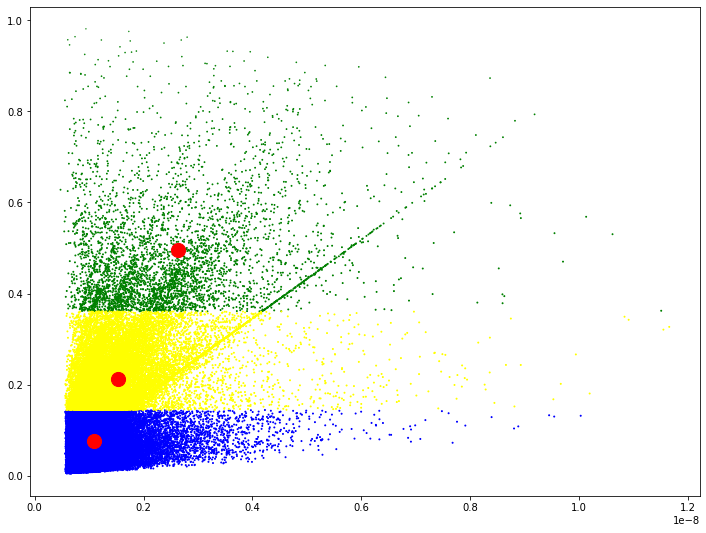

In [23]:
# Plot the data
ax = plt.figure(figsize=(12, 9))


c0 = user_engagment[user_engagment['clusters_by_engagement']==0].index.values
c1 = user_engagment[user_engagment['clusters_by_engagement']==1].index.values
c2 = user_engagment[user_engagment['clusters_by_engagement']==2].index.values
plt.scatter(X[c0, 0], 
            X[c0, 1],
            X[c0, 2],
           color='blue')
plt.scatter(X[c1, 0], 
            X[c1, 1],
            X[c1, 2],
           color='green')
plt.scatter(X[c2, 0], 
            X[c2, 1],
            X[c2, 2],
           color='yellow')

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

## Plotly 3D scatter plot

/tmp/ipykernel_92386/1119356922.py:3: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



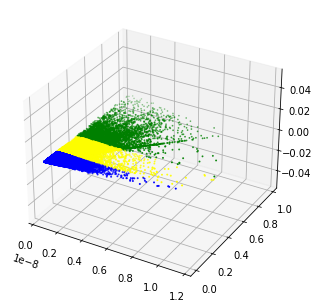

In [26]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig)
fig.add_axes(ax, auto_add_to_figure=False)
# ax.scatter(X[:,0],X[:,1],X[:,2])#,color=pred_y)
plt.scatter(X[c0, 0], 
            X[c0, 1],
            X[c0, 2],
           color='blue')
plt.scatter(X[c1, 0], 
            X[c1, 1],
            X[c1, 2],
           color='green')
plt.scatter(X[c2, 0], 
            X[c2, 1],
            X[c2, 2],
           color='yellow')
# ax.scatter(pred_y,color='green')
# ax.scatter(x[100:150,0],x[100:150,1],x[100:150,2],color='blue')
plt.show()


With plotly

In [39]:

fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2], color=user_engagment['clusters_by_engagement'])
fig.show()